In [1]:
# Import required packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [2]:
# Import database
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hour,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python,R,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,0,49,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0,38,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,1,12,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1,57,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1,24,1,0,0,0,1,data scientist,na,2728,3


In [3]:
# Columns selection

df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hour','employer_provided',
             'job_state','same_state','age','python','spark','aws','excel','job_simp','seniority','desc_len']]

In [4]:
df_model.shape

(742, 20)

In [5]:
# Get a dummy of each column and catenate it

df_dummies = pd.get_dummies(df_model,drop_first=True)
df_dummies.shape

(742, 170)

In [6]:
# Select the target and the rest of features

features= df_dummies.drop('avg_salary', axis =1)
target = df_dummies.avg_salary.values

In [7]:
# Import split tool 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Linear Regression Model

In [8]:
# Import Linear Regression model

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

train_predict = reg.predict(X_train)
test_predict = reg.predict(X_test)

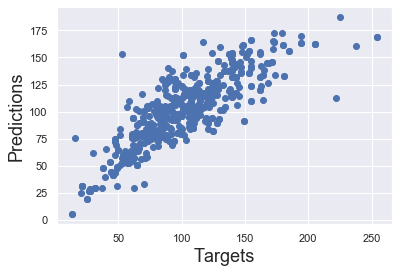

0.7164274335917562

In [9]:
# Visualize predictions against targets

plt.scatter(y_train,train_predict)
plt.xlabel('Targets', size=18)
plt.ylabel('Predictions', size=18)
plt.show()

reg.score(X_train,y_train)

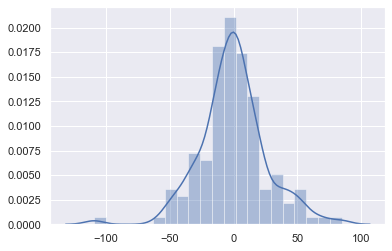

In [10]:
sns.distplot((y_test-test_predict))

In [11]:
# Import mean absolute error metric

from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(y_train,train_predict)
print(train_mae)
test_mae = mean_absolute_error(y_test, test_predict)
print(test_mae)

14.549237893395574
18.83947419866045


In [12]:
# Import cross-validation 

from sklearn.model_selection import cross_val_score

reg_cross = cross_val_score(reg,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)
reg_cross

array([-20.49195929, -19.57751943, -22.60376753])

In [13]:
np.mean(reg_cross)

-20.8910820829196

### Linear Regression Optimization

There are two popular feature selection techniques that can be used for numerical input data and a numerical target variable.

They are:

1. Correlation Statistics.
2. Mutual Information Statistics.

In [14]:
# evaluation of a model using k=10 and k='all' features chosen with correlation. 'all' showed best results

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k= 'all') # 'all' was best output
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 18.839


In [15]:
# evaluation of a model using k=88 features chosen with mutual information, k='all' showed best results 

from sklearn.feature_selection import mutual_info_regression

 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 18.839


### Tune the Number of Selected Features

In [16]:
# compare different numbers of features selected using mutual information

from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(features.shape[1]-20, features.shape[1]+1)]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(features, target)

# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

/Users/haithamqutaiba/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best MAE: -19.102
Best Config: {'sel__k': 150}
>-19.220 with: {'sel__k': 149}
>-19.102 with: {'sel__k': 150}
>-19.206 with: {'sel__k': 151}
>-19.104 with: {'sel__k': 152}
>-19.113 with: {'sel__k': 153}
>-19.186 with: {'sel__k': 154}
>-19.110 with: {'sel__k': 155}
>-19.126 with: {'sel__k': 156}
>-19.210 with: {'sel__k': 157}
>-19.112 with: {'sel__k': 158}
>-19.177 with: {'sel__k': 159}
>-19.185 with: {'sel__k': 160}
>-19.107 with: {'sel__k': 161}
>-19.171 with: {'sel__k': 162}
>-19.111 with: {'sel__k': 163}
>-19.126 with: {'sel__k': 164}
>-19.159 with: {'sel__k': 165}
>-19.134 with: {'sel__k': 166}
>-19.185 with: {'sel__k': 167}
>-19.173 with: {'sel__k': 168}
>-19.170 with: {'sel__k': 169}


### Ridge Model

In [17]:
# Import Ridge model
from sklearn.linear_model import Ridge

# define model
rid = Ridge(alpha=1.0)

# evaluate model
ridge_cross = cross_val_score(rid,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)
np.mean(ridge_cross)

-19.44757798521945

In [18]:
# Ridge Optimization through GridSearchCV

from sklearn.model_selection import GridSearchCV

# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# define search
search = GridSearchCV(rid, grid, scoring='neg_mean_absolute_error', cv=3)

# perform the search
results = search.fit(X_train, y_train)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -19.448
Config: {'alpha': 0.99}


/Users/haithamqutaiba/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### ElasticNet Model

In [19]:
# Import ElasticNet model
from sklearn.linear_model import ElasticNet

Elstic = ElasticNet(alpha=1.0, l1_ratio=0.5, tol=0.00000000000001, max_iter=1000000)
Elstic_cross = cross_val_score(Elstic,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)
np.mean(Elstic_cross)

-25.35946349378287

### Lasso Model

In [20]:
# Import Lasso model
from sklearn.linear_model import Lasso

# define model
las = Lasso(alpha=1.0)

# evaluate model
las_cross = cross_val_score(las,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)
np.mean(ridge_cross)

-19.44757798521945

### Models performance

1. Linear Regression model: 18.83 MAE
2. Ridge model: 19.44 MAE
3. ElasticNet model: 25.35 MAE
4. Lasso model: 19.44 MAE